# Chapter 10

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

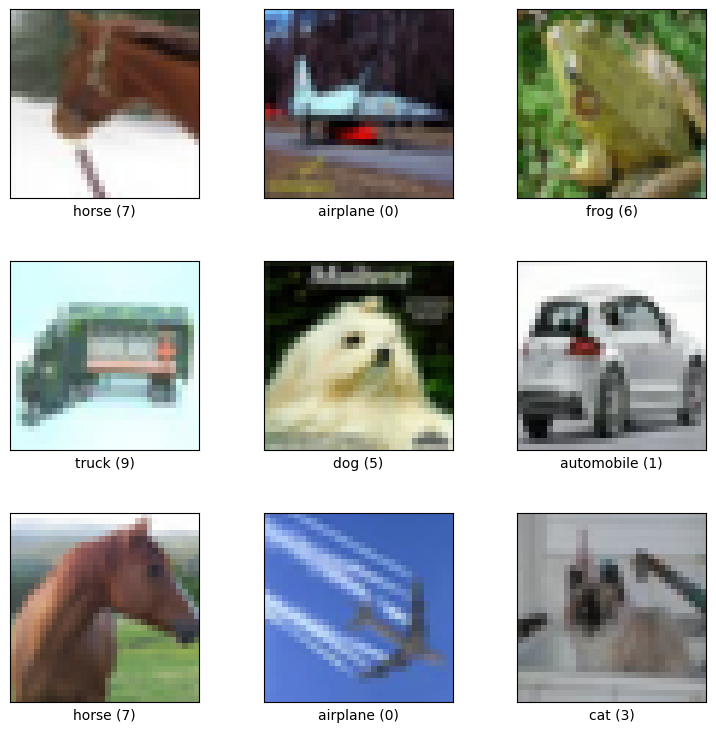

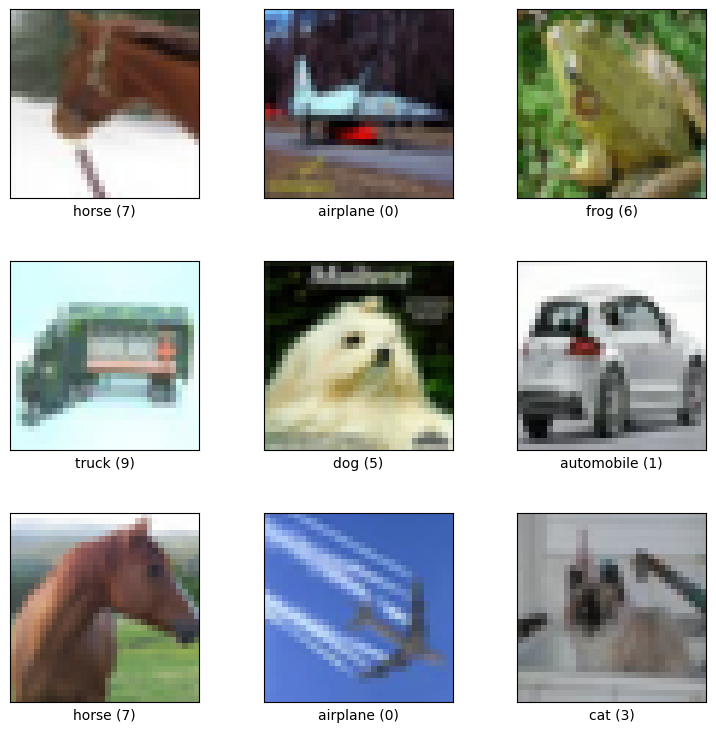

In [ ]:
## We can display a few images of the dataset by using the visualisation module of the tensorflow_datasets library:
ds, ds_info = tfds.load('cifar10', with_info=True, split='test')
tfds.visualization.show_examples(ds, ds_info)

In [ ]:
#The CIFAR 10 dataset is composed of a training set of 50,000 images and a test set of 10,000 images, all of which have a dimension of 32x32x3.
#We can display the dimensions of a subset of images to verify that as follows:
from tensorflow.python.types import data
ds_sample_of_three_images = ds.take(3)
for dataset_element in list(ds_sample_of_three_images.as_numpy_iterator()):
  image = dataset_element['image']
  print("shape of image: ", image.shape)


shape of image:  (32, 32, 3)
shape of image:  (32, 32, 3)
shape of image:  (32, 32, 3)


In [ ]:
# Now let us download the full dataset.
# The load function of the tensorflow_dataset module allow us to automatically split the dataset into different chunks as we load the images.
train_ds, val_ds, test_ds = tfds.load('cifar10', split=['train[:80%]','train[80%:]', 'test'],
                               as_supervised = True, batch_size=64
                               )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteOM9MFR/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteOM9MFR/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


As all the images already have the same size we do not need to resize them in the pre-processing phase. Hence our pre-processing will only consist in normalizing the images so that they have values between -1 and 1. We will include the pre-processing step in the Keras model specification as a specific layer.
As a result, our first standard CNN architecture will be built as follows:

	A rescaling layer which will make our pixel values range from -1 to 1
	3 convolutional block composed of:
	A convolutional layer with 32 filters of size 3
	A ReLU activation layer
	A max-pooling layer of size 2
	A flattening layer
	A dense layer of 64 outputs
	A ReLU layer
	A dense layer with 10 outputs corresponding to our 10 classes
  
Let us see how to write such a model in Keras with the sequential API:


In [ ]:
classes = 10
input_shape = (32,32,3)

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=input_shape),
  tf.keras.layers.Rescaling(1./127.5, offset=-1),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(classes)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 32)         

In [ ]:
import random

random.seed(0)

we will execute the following cell that will make Keras read the following batch of data while the previous batch is being processed:

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

However you can observe that we still have not defined our optimizer, learning rate, cost function and metrics. For this, we can use the compile method of the Sequential model object we have just created. This compile method has

	an “optimizer” parameter, which can take a string as input, that is a keyword representing the type of optimizer we want to use, for instance “SGD” for stochastic gradient descent. It can also take as input an instance of an optimizer class like tf.keras.optimizers.SGD
	a loss parameter that can also take as input either a string which is a key word representing the name of our loss function or an instance of a loss class like tf.keras.losses.SparseCategoricalCrossentropy. For this loss function, the labels are expected to be provided as integer instead of one-hot encoded labels. Also if you set the from_logits parameter to True, the loss function will also apply the softmax activation function for you.
	A metrics parameter where you need to define the list of metrics you want to follow. Those metrics can be entered as strings, “accuracy” for example, functions or instances of the tf.keras.metrics.Metric class.
  
In our case, below is our call to the compile function:

In [ ]:
# taken
model.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=35)

Epoch 1/35
625/625 [==============================] - 13s 5ms/step - loss: 2.1513 - accuracy: 0.2072 - val_loss: 1.9335 - val_accuracy: 0.2964
Epoch 2/35
625/625 [==============================] - 2s 4ms/step - loss: 1.8213 - accuracy: 0.3383 - val_loss: 1.7280 - val_accuracy: 0.3664
Epoch 3/35
625/625 [==============================] - 3s 4ms/step - loss: 1.6730 - accuracy: 0.3880 - val_loss: 1.6222 - val_accuracy: 0.4030
Epoch 4/35
625/625 [==============================] - 2s 4ms/step - loss: 1.5761 - accuracy: 0.4234 - val_loss: 1.5417 - val_accuracy: 0.4336
Epoch 5/35
625/625 [==============================] - 2s 4ms/step - loss: 1.5009 - accuracy: 0.4561 - val_loss: 1.4710 - val_accuracy: 0.4625
Epoch 6/35
625/625 [==============================] - 2s 4ms/step - loss: 1.4377 - accuracy: 0.4812 - val_loss: 1.4131 - val_accuracy: 0.4900
Epoch 7/35
625/625 [==============================] - 2s 4ms/step - loss: 1.3854 - accuracy: 0.5016 - val_loss: 1.3688 - val_accuracy: 0.5047
Epoch

We can see that in the first epochs, the accuracy on the validation set is improving rapidly. After reaching the 62% mark, the accuracy score starts to decrease its improvement rate to finally stagnate at 64%. This 64% landmark will be our baseline score. Let us see how to improve it through several levers.
One idea would be to train the model on many more epochs. We could try to put 50 epochs instead of 35.

**Which accuracy do you get?**

the accuracy on the validation set keeps improving very slowly. On the training set this improvement seems to be a bit more important but it is still not comparable to earlier steps. The slow improvement on the training set may be an indication that the model is not complex enough. So let us experiment by trying to increase the model’s complexity. There are a few ways to do so, among which increasing the number of filters at each layer and increasing the number of layers.
We are first trying to increase the number of filters for each convolution layer and the number of neurons on the hidden dense layer as follows:

In [ ]:
classes = 10
input_shape = (32,32,3)

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=input_shape),
  tf.keras.layers.Rescaling(1./127.5, offset=-1),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(classes)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 4, 512)       

In [ ]:
model.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
625/625 [==============================] - 6s 7ms/step - loss: 2.0758 - accuracy: 0.2599 - val_loss: 1.8370 - val_accuracy: 0.3404
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 1.7198 - accuracy: 0.3812 - val_loss: 1.6123 - val_accuracy: 0.4126
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 1.5382 - accuracy: 0.4452 - val_loss: 1.4843 - val_accuracy: 0.4629
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 1.4243 - accuracy: 0.4924 - val_loss: 1.4103 - val_accuracy: 0.4908
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 1.3358 - accuracy: 0.5283 - val_loss: 1.3560 - val_accuracy: 0.5143
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 1.2633 - accuracy: 0.5576 - val_loss: 1.3025 - val_accuracy: 0.5319
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 1.2006 - accuracy: 0.5819 - val_loss: 1.2596 - val_accuracy: 0.5501
Epoch 

As we can observe, the model has a perfect accuracy score on the training dataset. However, the accuracy on the validation dataset is much lower, although it has improved compared to our previous iteration. A large gap between the score on the training dataset and the score on the validation dataset is a symptom of the overfitting problem.

In [ ]:
# Regularization
#Let us introduce L2-regularization and dropout into our network:

classes = 10
input_shape = (32,32,3)
regularizer = tf.keras.regularizers.L2(l2=0.001)
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=input_shape),
  tf.keras.layers.Rescaling(1./127.5, offset=-1),
  tf.keras.layers.Conv2D(64, 3, activation='relu',
                         kernel_regularizer=regularizer),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu',
                         kernel_regularizer=regularizer),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu',
                         kernel_regularizer=regularizer),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu',
                         kernel_regularizer=regularizer),

  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(classes, kernel_regularizer=regularizer)
])

model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 dropout_11 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 128)       0         
                                                     

In [ ]:
model.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
625/625 [==============================] - 6s 9ms/step - loss: 2.5327 - accuracy: 0.2774 - val_loss: 2.5183 - val_accuracy: 0.3562
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 2.2085 - accuracy: 0.3909 - val_loss: 2.3591 - val_accuracy: 0.4221
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 2.0591 - accuracy: 0.4484 - val_loss: 2.2593 - val_accuracy: 0.4573
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 1.9574 - accuracy: 0.4838 - val_loss: 2.1604 - val_accuracy: 0.5013
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 1.8780 - accuracy: 0.5141 - val_loss: 2.0995 - val_accuracy: 0.5260
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 1.8081 - accuracy: 0.5367 - val_loss: 2.0371 - val_accuracy: 0.5371
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 1.7543 - accuracy: 0.5539 - val_loss: 1.9786 - val_accuracy: 0.5673
Epoch 

We can see that the accuracy on the training set drops from a perfect score of 1 down to 0.84. However, what is more interesting to us is that the model generalizes better since the accuracy on the validation set went from 69% to 76% on the best iteration.

In [ ]:
# With Adam optimizer
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=25)

Epoch 1/25
625/625 [==============================] - 4s 4ms/step - loss: 1.6291 - accuracy: 0.4044 - val_loss: 1.4868 - val_accuracy: 0.4542
Epoch 2/25
625/625 [==============================] - 2s 4ms/step - loss: 1.2942 - accuracy: 0.5360 - val_loss: 1.3239 - val_accuracy: 0.5186
Epoch 3/25
625/625 [==============================] - 2s 4ms/step - loss: 1.1660 - accuracy: 0.5900 - val_loss: 1.2209 - val_accuracy: 0.5646
Epoch 4/25
625/625 [==============================] - 2s 4ms/step - loss: 1.0767 - accuracy: 0.6245 - val_loss: 1.1376 - val_accuracy: 0.6001
Epoch 5/25
625/625 [==============================] - 2s 4ms/step - loss: 1.0098 - accuracy: 0.6472 - val_loss: 1.1024 - val_accuracy: 0.6117
Epoch 6/25
625/625 [==============================] - 2s 4ms/step - loss: 0.9570 - accuracy: 0.6666 - val_loss: 1.0816 - val_accuracy: 0.6203
Epoch 7/25
625/625 [==============================] - 2s 4ms/step - loss: 0.9143 - accuracy: 0.6831 - val_loss: 1.0765 - val_accuracy: 0.6286
Epoch 

In [ ]:
from keras.layers import Input, Dense, Conv2D, BatchNormalization
from keras.layers import Dropout, MaxPooling2D, Rescaling, ReLU, ELU
from keras.layers import GlobalAveragePooling2D, Add, Flatten
from keras.models import Model

In [ ]:
classes = 10
input_shape = (32,32,3)
regularizer = tf.keras.regularizers.L2(l2=0.001)
input = Input(shape=input_shape)
x = Rescaling(1./127.5, offset=-1)(input)
x = Conv2D(64, 3, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
x = MaxPooling2D()(x)
x = Conv2D(512, 3, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
y = Dense(classes, kernel_regularizer=regularizer)(x)

model = Model(input, y)
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_31 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_118 (Conv2D)         (None, 30, 30, 64)        1792      
                                                                 
 dropout_93 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 13, 13, 128)       73856     
                                                           

In [ ]:
classes = 10
input_shape = (32,32,3)
regularizer = tf.keras.regularizers.L2(l2=0.001)
input = Input(shape=input_shape)
x = Rescaling(1./127.5, offset=-1)(input)
x = Conv2D(64, 3, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu', kernel_regularizer=regularizer, padding="same")(x)
x = Dropout(0.3)(x)
x = Conv2D(128, 3, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, activation='relu', kernel_regularizer=regularizer, padding="same")(x)
x = Dropout(0.3)(x)
x = Conv2D(512, 3, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
x = Conv2D(512, 3, activation='relu', kernel_regularizer=regularizer, padding="same")(x)
x = Dropout(0.3)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizer)(x)
x = Dropout(0.3)(x)
y = Dense(classes, kernel_regularizer=regularizer)(x)

model = Model(input, y)
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_40 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_167 (Conv2D)         (None, 30, 30, 64)        1792      
                                                                 
 dropout_146 (Dropout)       (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_101 (MaxPool  (None, 15, 15, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_168 (Conv2D)         (None, 15, 15, 64)        36928     
                                                          

In [ ]:
classes = 10
input_shape = (32,32,3)
regularizer = tf.keras.regularizers.L2(l2=0.0001)
input = Input(shape=input_shape)
x = Rescaling(1./127.5, offset=-1)(input)
x = Conv2D(32, 3, kernel_regularizer=regularizer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = MaxPooling2D()(x)

x = Conv2D(64, 3, kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

x = Conv2D(64, 3, kernel_regularizer=regularizer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = MaxPooling2D()(x)

x = Conv2D(128, 3, kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

x = Conv2D(128, 3, kernel_regularizer=regularizer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

x = Conv2D(512, 3, kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)
y = Dense(classes, kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)

model = Model(input, y)
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_35 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_139 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_59 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 re_lu_49 (ReLU)             (None, 30, 30, 32)        0         
                                                                 
 dropout_116 (Dropout)       (None, 30, 30, 32)        0         
                                                          

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
625/625 [==============================] - 9s 11ms/step - loss: 1.7058 - accuracy: 0.4068 - val_loss: 1.9985 - val_accuracy: 0.3454
Epoch 2/50
625/625 [==============================] - 6s 10ms/step - loss: 1.3760 - accuracy: 0.5294 - val_loss: 1.7025 - val_accuracy: 0.4196
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 1.2394 - accuracy: 0.5848 - val_loss: 1.5749 - val_accuracy: 0.4710
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 1.1433 - accuracy: 0.6160 - val_loss: 1.4646 - val_accuracy: 0.5142
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 1.0727 - accuracy: 0.6477 - val_loss: 1.2941 - val_accuracy: 0.5695
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 1.0148 - accuracy: 0.6686 - val_loss: 1.3194 - val_accuracy: 0.5622
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 0.9652 - accuracy: 0.6885 - val_loss: 1.1931 - val_accuracy: 0.6035

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
625/625 [==============================] - 22s 10ms/step - loss: 1.4528 - accuracy: 0.4662 - val_loss: 1.4534 - val_accuracy: 0.4795
Epoch 2/30
625/625 [==============================] - 5s 8ms/step - loss: 1.0961 - accuracy: 0.6184 - val_loss: 1.4276 - val_accuracy: 0.5476
Epoch 3/30
625/625 [==============================] - 5s 8ms/step - loss: 0.9632 - accuracy: 0.6738 - val_loss: 1.4007 - val_accuracy: 0.5580
Epoch 4/30
625/625 [==============================] - 5s 8ms/step - loss: 0.8788 - accuracy: 0.7074 - val_loss: 1.2339 - val_accuracy: 0.6105
Epoch 5/30
625/625 [==============================] - 5s 8ms/step - loss: 0.8222 - accuracy: 0.7329 - val_loss: 1.0881 - val_accuracy: 0.6552
Epoch 6/30
625/625 [==============================] - 5s 8ms/step - loss: 0.7775 - accuracy: 0.7505 - val_loss: 1.0660 - val_accuracy: 0.6645
Epoch 7/30
625/625 [==============================] - 5s 8ms/step - loss: 0.7399 - accuracy: 0.7677 - val_loss: 0.9822 - val_accuracy: 0.6956
Epoc

In [ ]:
classes = 10
input_shape = (32,32,3)
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')
regularizer = tf.keras.regularizers.L2(l2=0.0001)
input = Input(shape=input_shape)
x = Rescaling(1./127.5, offset=-1)(input)
x = Conv2D(32, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x1 = MaxPooling2D()(x)
x = Conv2D(64, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x1)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = Conv2D(64, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x1 = Conv2D(128, 1, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x1)
x1 = BatchNormalization()(x1)
x = Conv2D(128, 1, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x2 = Add()([x1, x])
x = ReLU()(x2)
x = Dropout(0.2)(x)
x = Conv2D(128, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = Conv2D(128, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)

x3 = Add()([x2, x])
x = ReLU()(x3)
x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu', kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)
y = Dense(classes, kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)

model = Model(input, y)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling_18 (Rescaling)    (None, 32, 32, 3)            0         ['input_25[0][0]']            
                                                                                                  
 conv2d_66 (Conv2D)          (None, 30, 30, 32)           896       ['rescaling_18[0][0]']        
                                                                                                  
 batch_normalization_64 (Ba  (None, 30, 30, 32)           128       ['conv2d_66[0][0]']           
 tchNormalization)                                                                          

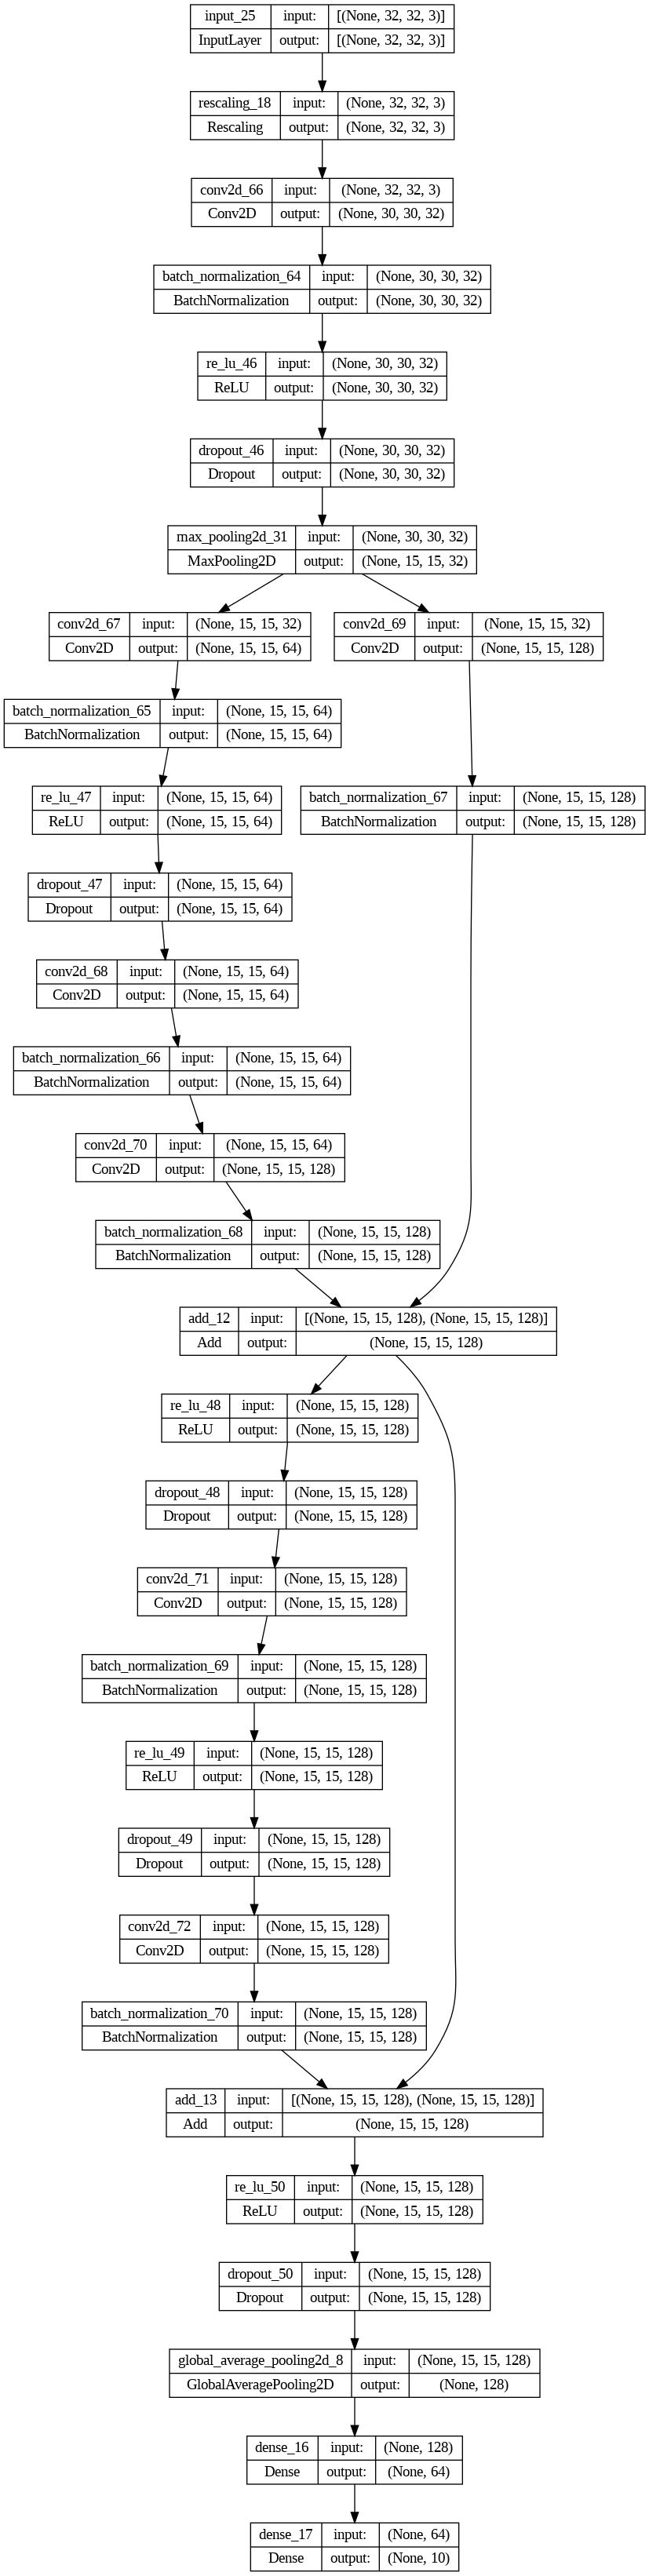

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
625/625 [==============================] - 11s 9ms/step - loss: 1.5467 - accuracy: 0.4181 - val_loss: 1.5109 - val_accuracy: 0.4487
Epoch 2/30
625/625 [==============================] - 5s 9ms/step - loss: 1.2196 - accuracy: 0.5683 - val_loss: 1.1702 - val_accuracy: 0.5929
Epoch 3/30
625/625 [==============================] - 5s 9ms/step - loss: 1.0853 - accuracy: 0.6262 - val_loss: 1.2171 - val_accuracy: 0.5844
Epoch 4/30
625/625 [==============================] - 5s 9ms/step - loss: 1.0068 - accuracy: 0.6586 - val_loss: 1.0062 - val_accuracy: 0.6609
Epoch 5/30
625/625 [==============================] - 5s 9ms/step - loss: 0.9519 - accuracy: 0.6827 - val_loss: 0.9856 - val_accuracy: 0.6669
Epoch 6/30
625/625 [==============================] - 6s 9ms/step - loss: 0.9025 - accuracy: 0.7044 - val_loss: 0.9508 - val_accuracy: 0.6864
Epoch 7/30
625/625 [==============================] - 5s 9ms/step - loss: 0.8566 - accuracy: 0.7236 - val_loss: 0.9084 - val_accuracy: 0.7056
Epoch